In [1]:
# 27 Oct 2018
# calculate quantities relating to GEOMETRIC (see Marshall et al, 2012; Youngs et al, 2017)
# possibly some stuff to do with Mads?
# (see Waterman et al papers and the one with J. Lilly also)

from pydra_misc import *
from pydra_analysis import *
from pydra_plot import *
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

from casl import parameters, spectral, constants

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["image.cmap"] = "RdBu_r" # "*_r" is reverse of standard colour
plt.rcParams["axes.formatter.limits"] = [-3, 3]

number of frames found = 751 


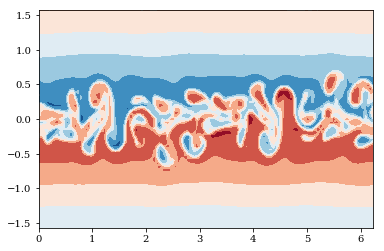

In [2]:
kt = 50

data_dir = "/home/julian/data/hydra_data/jet/nx128ny64hb0.50kd20.0bdpi0.8w0.50r001/"
# data_dir = "/home/mak/data/hydra_data/jet/nx128ny64hb0.50kd20.0bdpi0.8w0.50r001/"

t_now, qq = read_qq(data_dir, parameters.nx, parameters.ny, kt, num_frame = True)

# swap axis to have the indexing consistent with the Fortran code main_invert
qq = np.swapaxes(qq, 0, 1)

# no topography
fhb = np.zeros((parameters.ny + 1, parameters.nx))

x_vec = np.linspace(0, parameters.ellx, parameters.nx, endpoint = False)
y_vec = np.linspace(-parameters.elly / 2, parameters.elly / 2, parameters.ny + 1)

# note the layer index is the other way round...
plt.contourf(x_vec, y_vec, qq[:, :, 0])

Momentum diagnostics

EKE is as usual:

$K_i = \overline{\cfrac{u_i'^2 + v_i'^2}{2}}$

The $M$ and $N$ quantities are defined as (notice the sign differences as compared to Waterman & Hoskins, 2013):

$M_i = \overline{\cfrac{v_i'v_i' - u_i'u_i'}{2}}, \qquad N_i = \overline{v_i'u_i'}$

The analogous modal quantities are constructed with the relevant modal velocities.

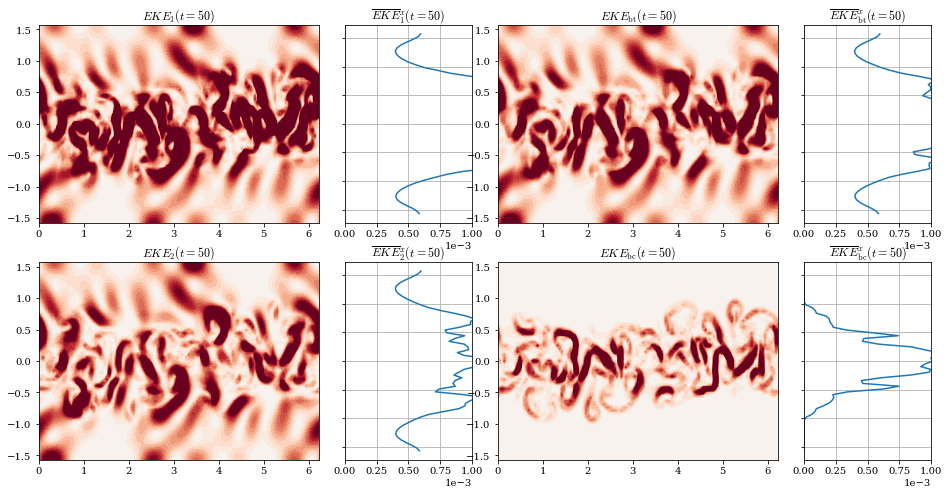

In [3]:
# plots of EKE

# Observation: baroclinic EKE is equally large with barotropic EKE as instability goes into nonlinear stage, then
#              decreases and eventually barotropic EKE dominates
#              EKE_bc as one measure of exhaustion of baroclinic processes?
#                 plot out <EKE_bc / (<EKE_bt> + <EKE_bc>) or something like that
#
# note also that correlations of modal quantities is NOT the same as the modal quantities of the correlations
#    (similarly for Fourier modes, e.g. <u'(k) v'(k)> is not <u'v'>(k), the latter is zero by definition with zonal avg)
# ? which one to use? probably quantities constructed from modes
#                     or maybe ditch modes all together?

kt = 75
lim_max = 0.002

K_L1L2, K_btbc, M_L1L2, N_L1L2, M_btbc, N_btbc = calc_eddy_mom(data_dir, parameters, constants, kt)

level_vec = np.linspace(-lim_max, lim_max, 31)

fig = plt.figure(figsize=(16, 8))

# layers (note layers index are annoyingly the other way round)
ax = plt.subplot2grid((2, 6), (0, 0), colspan = 2)
ax.contourf(x_vec, y_vec, K_L1L2[:, :, 1], level_vec, extend = "max")
ax.set_title(r"$EKE_1 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 0), colspan = 2)
ax.contourf(x_vec, y_vec, K_L1L2[:, :, 0], level_vec, extend = "max")
ax.set_title(r"$EKE_2 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 2), colspan = 1)
ax.plot(zonal_ave(K_L1L2[:, :, 1]), y_vec)
ax.set_xlim([0, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{EKE}_{1}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 2), colspan = 1)
ax.plot(zonal_ave(K_L1L2[:, :, 0]), y_vec)
ax.set_xlim([0, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{EKE}_{2}^x (t = %g)$" % t_now)
ax.grid()

# modes (but modes are correct)
ax = plt.subplot2grid((2, 6), (0, 3), colspan = 2)
ax.contourf(x_vec, y_vec, K_btbc[:, :, 0], level_vec, extend = "max")
ax.set_title(r"$EKE_{\rm bt} (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 3), colspan = 2)
ax.contourf(x_vec, y_vec, K_btbc[:, :, 1], level_vec, extend = "max")
ax.set_title(r"$EKE_{\rm bc} (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 5), colspan = 1)
ax.plot(zonal_ave(K_btbc[:, :, 0]), y_vec)
ax.set_xlim([0, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{EKE}_{\rm bt}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 5), colspan = 1)
ax.plot(zonal_ave(K_btbc[:, :, 1]), y_vec)
ax.set_xlim([0, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{EKE}_{\rm bc}^x (t = %g)$" % t_now)
ax.grid()

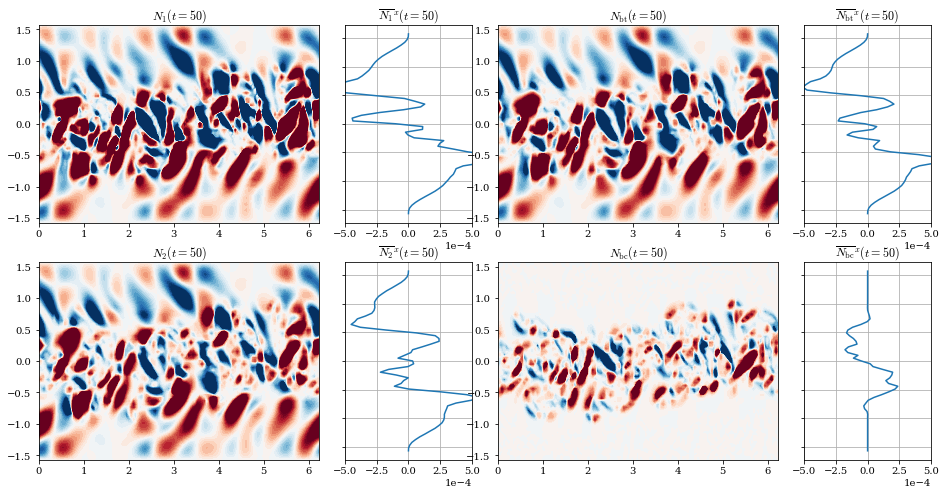

In [4]:
# generate the momentum related quantities

# Observation: baroclinic Reynolds stress is generally quite a bit smaller than barotropic Reynolds stresses

kt = 75
lim_max = 0.001

level_vec = np.linspace(-lim_max, lim_max, 31)

fig = plt.figure(figsize=(16, 8))

# layers (note layers index are annoyingly the other way round)
ax = plt.subplot2grid((2, 6), (0, 0), colspan = 2)
ax.contourf(x_vec, y_vec, N_L1L2[:, :, 1], level_vec, extend = "both")
ax.set_title(r"$N_1 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 0), colspan = 2)
ax.contourf(x_vec, y_vec, N_L1L2[:, :, 0], level_vec, extend = "both")
ax.set_title(r"$N_2 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 2), colspan = 1)
ax.plot(zonal_ave(N_L1L2[:, :, 1]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{N_1}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 2), colspan = 1)
ax.plot(zonal_ave(N_L1L2[:, :, 0]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{N_2}^x (t = %g)$" % t_now)
ax.grid()

# modes
ax = plt.subplot2grid((2, 6), (0, 3), colspan = 2)
ax.contourf(x_vec, y_vec, N_btbc[:, :, 0], level_vec, extend = "both")
ax.set_title(r"$N_{\rm bt} (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 3), colspan = 2)
ax.contourf(x_vec, y_vec, N_btbc[:, :, 1], level_vec, extend = "both")
ax.set_title(r"$N_{\rm bc} (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 5), colspan = 1)
ax.plot(zonal_ave(N_btbc[:, :, 0]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{N_{\rm bt}}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 5), colspan = 1)
ax.plot(zonal_ave(N_btbc[:, :, 1]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{N_{\rm bc}}^x (t = %g)$" % t_now)
ax.grid()

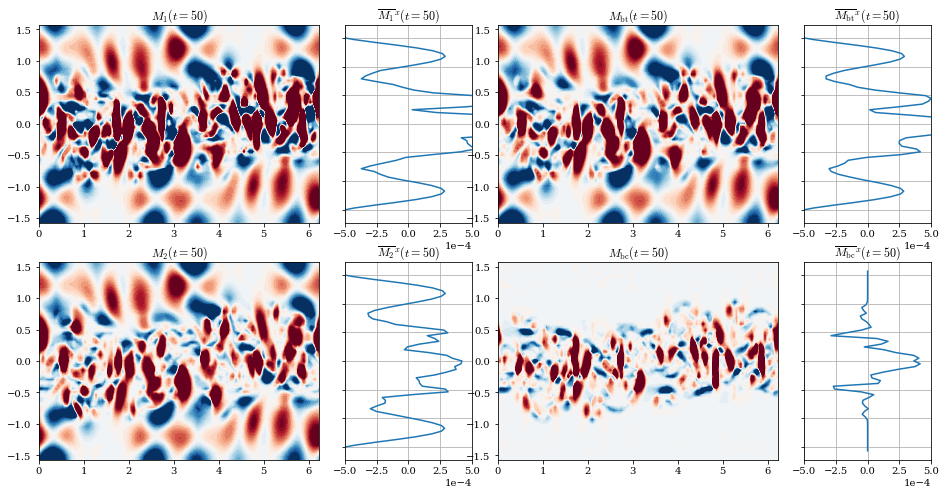

In [5]:
# Observation: baroclinic M is generally quite a bit smaller than barotropic M stresses
#              M seems to be persistent in the magnitude as well

lim_max = 0.001
level_vec = np.linspace(-lim_max, lim_max, 31)

fig = plt.figure(figsize=(16, 8))

# layers (note layers index are annoyingly the other way round)
ax = plt.subplot2grid((2, 6), (0, 0), colspan = 2)
ax.contourf(x_vec, y_vec, M_L1L2[:, :, 1], level_vec, extend = "both")
ax.set_title(r"$M_1 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 0), colspan = 2)
ax.contourf(x_vec, y_vec, M_L1L2[:, :, 0], level_vec, extend = "both")
ax.set_title(r"$M_2 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 2), colspan = 1)
ax.plot(zonal_ave(M_L1L2[:, :, 1]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{M_1}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 2), colspan = 1)
ax.plot(zonal_ave(M_L1L2[:, :, 0]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{M_2}^x (t = %g)$" % t_now)
ax.grid()

# modes
ax = plt.subplot2grid((2, 6), (0, 3), colspan = 2)
ax.contourf(x_vec, y_vec, M_btbc[:, :, 0], level_vec, extend = "both")
ax.set_title(r"$M_{\rm bt} (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 3), colspan = 2)
ax.contourf(x_vec, y_vec, M_btbc[:, :, 1], level_vec, extend = "both")
ax.set_title(r"$M_{\rm bc} (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 5), colspan = 1)
ax.plot(zonal_ave(M_btbc[:, :, 0]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{M_{\rm bt}}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 5), colspan = 1)
ax.plot(zonal_ave(M_btbc[:, :, 1]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{M_{\rm bc}}^x (t = %g)$" % t_now)
ax.grid()

In [6]:
# spit out the plots as a time-series
# for kt in range(751):
#     if kt % 100 == 0:
#         print("kt = %g / 751..." % kt)
#     gamma_m_L1L2, phi_m_L1L2, gamma_m_btbc, phi_m_btbc = calc_geom_param(data_dir, parameters, constants, kt)
#     fig = plt.figure(figsize=(16, 8))
#     plot_geom_mom_param(gamma_m_L1L2, phi_m_L1L2, gamma_m_btbc, phi_m_btbc, y_vec, kt + 1)
#     fig.savefig("./analysis/gam_phi_m_t%.3d.png" % (kt + 1))
#     plt.close(fig)

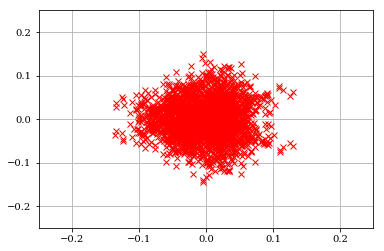

In [7]:
# u'v' scatter plot?

kt = 50
t_now, qq = read_qq(data_dir, parameters.nx, parameters.ny, kt)
# swap axis to have the indexing consistent with the Fortran code main_invert
qq = np.swapaxes(qq, 0, 1)

# no topography
fhb = np.zeros((parameters.ny + 1, parameters.nx))

# invert for the velocity fields
uu, vv, _ = spectral.main_invert(qq, fhb)

uu[:, :, 1] = zonal_demean(uu[:, :, 1])
uu[:, :, 0] = zonal_demean(uu[:, :, 0])
vv[:, :, 1] = zonal_demean(vv[:, :, 1])
vv[:, :, 0] = zonal_demean(vv[:, :, 0])

ax = plt.axes()
ax.plot(uu[:, :, 0].flatten(), vv[:, :, 0].flatten(), 'rx')
ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-0.25, 0.25)
ax.grid()

Buoyancy diagnostics

In the notation of Maddison et al. (2015) and notation here, it should be

$P_1 = \cfrac{s_1^+}{4}\overline{(\psi_2' - \psi_1')^2} = \cfrac{H_2 k_d^2}{4}\overline{(\psi_2' - \psi_1')^2}$

$P_2 = \cfrac{s_2^-}{4}\overline{(\psi_1' - \psi_2')^2} = \cfrac{H_1 k_d^2}{4}\overline{(\psi_2' - \psi_1')^2}$

The buoyancy fluxes live on interfaces and assuming they are zero on top and bottom, the layer quantities come from averaging them to give

$R_{1,2} = \cfrac{f_0}{N_0^2}\overline{u'b'} = \cfrac{1}{2} \overline{\left( 0 + \cfrac{u_1' + u_2'}{2} H_1 H_2 k_d^2 (\psi_1' - \psi_2') \right)} = \cfrac{H_1 H_2 k_d^2}{4} \overline{(u_1' + u_2')(\psi_1' - \psi_2')}$

$S_{1,2} = \cfrac{f_0}{N_0^2}\overline{v'b'} = \cfrac{1}{2} \overline{\left( 0 + \cfrac{v_1' + v_2'}{2} H_1 H_2 k_d^2 (\psi_1' - \psi_2') \right)} = \cfrac{H_1 H_2 k_d^2}{4} \overline{(v_1' + v_2')(\psi_1' - \psi_2')}$

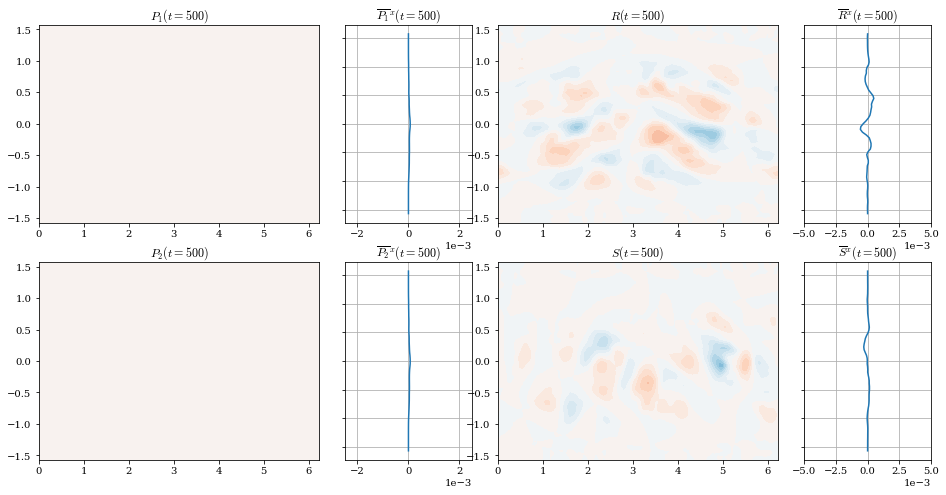

In [8]:
# buoyancy diagnostics
# note again the layers stuff is the other way around

kt = 500
t_now = kt

P, R, S = calc_eddy_buoy(data_dir, parameters, constants, kt)

# TODO: the mode bit doesn't make sense...
# pp_btbc = layers_to_modes(pp_eddy, constants)

# P_btbc = np.zeros(qq.shape)
# P_btbc[:, :, 0] = 0.25 * (1.0 - parameters.h1) * (parameters.kdbar ** 2) * (zonal_demean(pp[:, :, 0] - pp[:, :, 1])) ** 2
# P_btbc[:, :, 1] = 0.25 * (      parameters.h1) * (parameters.kdbar ** 2) * (zonal_demean(pp[:, :, 0] - pp[:, :, 1])) ** 2

lim_max = 0.005
level_vec = np.linspace(-lim_max, lim_max, 31)

fig = plt.figure(figsize=(16, 8))

# layers (note layers index are annoyingly the other way round)
ax = plt.subplot2grid((2, 6), (0, 0), colspan = 2)
ax.contourf(x_vec, y_vec, P[:, :, 1], level_vec, extend = "both")
ax.set_title(r"$P_1 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 0), colspan = 2)
ax.contourf(x_vec, y_vec, P[:, :, 0], level_vec, extend = "both")
ax.set_title(r"$P_2 (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 2), colspan = 1)
ax.plot(zonal_ave(P[:, :, 1]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{P_1}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 2), colspan = 1)
ax.plot(zonal_ave(P[:, :, 0]), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{P_2}^x (t = %g)$" % t_now)
ax.grid()

lim_max = 0.01
level_vec = np.linspace(-lim_max, lim_max, 31)

ax = plt.subplot2grid((2, 6), (0, 3), colspan = 2)
ax.contourf(x_vec, y_vec, R, level_vec, extend = "both")
ax.set_title(r"$R (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (1, 3), colspan = 2)
ax.contourf(x_vec, y_vec, S, level_vec, extend = "both")
ax.set_title(r"$S (t = %g)$" % t_now)

ax = plt.subplot2grid((2, 6), (0, 5), colspan = 1)
ax.plot(zonal_ave(R), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{R}^x (t = %g)$" % t_now)
ax.grid()

ax = plt.subplot2grid((2, 6), (1, 5), colspan = 1)
ax.plot(zonal_ave(S), y_vec)
ax.set_xlim([-lim_max / 2, lim_max / 2])
ax.set_yticklabels([])
ax.set_title(r"$\overline{S}^x (t = %g)$" % t_now)
ax.grid()

The momentum geometric parameters are then defined as

$\gamma_{m, i} = \cfrac{\sqrt{M^2_i + N^2_i}}{K_i}, \qquad \cos 2\phi_{m, i} = \cfrac{-M_i}{\sqrt{M_i^2 + N_i^2}}$,

with $\gamma_m \in [0, 1]$ and $\phi_m \in [0, \pi]$. The corresponding modal parameters are those quantities defined by the modal velocities.

The buoyancy geometric parameters are defined as

$\gamma_{b, i} = \cfrac{N_0}{2 f_0}\sqrt{\cfrac{R^2_i + S^2_i}{K_i P_i}}, \qquad \cos 2\phi_{b, i} = \cfrac{R_i}{\sqrt{R_i^2 + S_i^2}}$,

with $\gamma_b \in [0, 1]$ and $\phi_b \in [-\pi, \pi]$. In the limit of plane waves the ainsotropy parameters should be 1, and the angles are the angles of the phase propagation. Additionally, the energy partition angle is

$\cfrac{K}{E} = \cos^2 \lambda, \qquad \cfrac{P}{E} = \sin^2 \lambda$,

with $\lambda \in [0, \pi/2]$, $E = K + P$, and in this case, $\cfrac{f_0^2}{2 N_0^2} = \cfrac{H_1 H_2 k_d^2}{4}$.

In [9]:
kt = 50

gamma_m_L1L2, phi_m_L1L2, gamma_m_btbc, phi_m_btbc, gamma_b, phi_b, lam, K_L1L2, P, E_L1L2 = (
    calc_geom_param(data_dir, parameters, constants, kt))


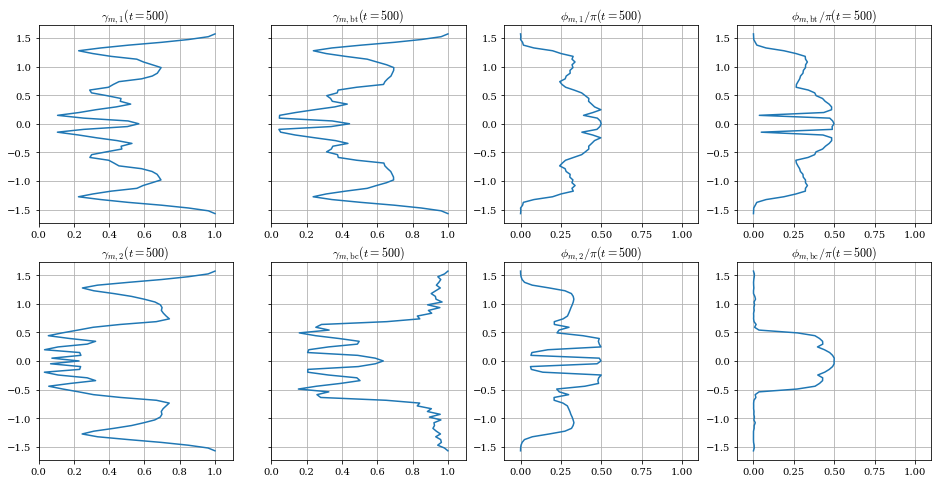

In [10]:
# TEST momentum anisotropy and angles
# gamma_m = sqrt(M^2 + N^2) / K (0 =< gamma_m =< 1)
# cos 2 phi_m = - M / sqrt(M^2 + N^2) (0 =< phi_m =< pi)

# Observation: well gamma_m is zero pointwise if averages are not taken for the individual components...duh
#              angles are positive so it is (?) barotropically stable
#              high anisotropy but low angle probably is wave-like
#              low anisotropy then angles don't really matter
#              so an alpha-like parameter combining the two probably to say something about waves?

fig = plt.figure(figsize=(16, 8))

plot_geom_mom_param(gamma_m_L1L2, phi_m_L1L2, gamma_m_btbc, phi_m_btbc, y_vec, t_now)

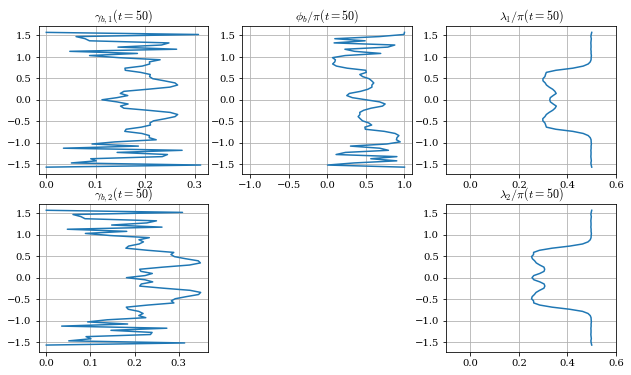

In [11]:
# check this for factors...?

fig = plt.figure(figsize=(14, 6))

ax = plt.subplot2grid((2, 4), (0, 0), colspan = 1)
ax.plot(gamma_b[:, 1], y_vec)
# ax.set_xlim([0, 10])
ax.set_title(r"$\gamma_{b, 1} (t = %g)$" % kt)
ax.grid()

ax = plt.subplot2grid((2, 4), (1, 0), colspan = 1)
ax.plot(gamma_b[:, 0], y_vec)
# ax.set_xlim([0, 10])
ax.set_title(r"$\gamma_{b, 2} (t = %g)$" % kt)
ax.grid()

ax = plt.subplot2grid((2, 4), (0, 1), colspan = 1)
ax.plot(phi_b / np.pi, y_vec)
ax.set_xlim([-1.1, 1.1])
ax.set_title(r"$\phi_{b} / \pi (t = %g)$" % kt)
ax.grid()

ax = plt.subplot2grid((2, 4), (0, 2), colspan = 1)
# ax.plot(phi_b1 / np.pi, y_vec)
ax.plot(lam[:, 1] / np.pi, y_vec)
ax.set_xlim([-0.1, 0.6])
ax.set_title(r"$\lambda_1 / \pi (t = %g)$" % kt)
ax.grid()

ax = plt.subplot2grid((2, 4), (1, 2), colspan = 1)
ax.plot(lam[:, 0] / np.pi, y_vec)
ax.set_xlim([-0.1, 0.6])
ax.set_title(r"$\lambda_2 / \pi (t = %g)$" % kt)
ax.grid()



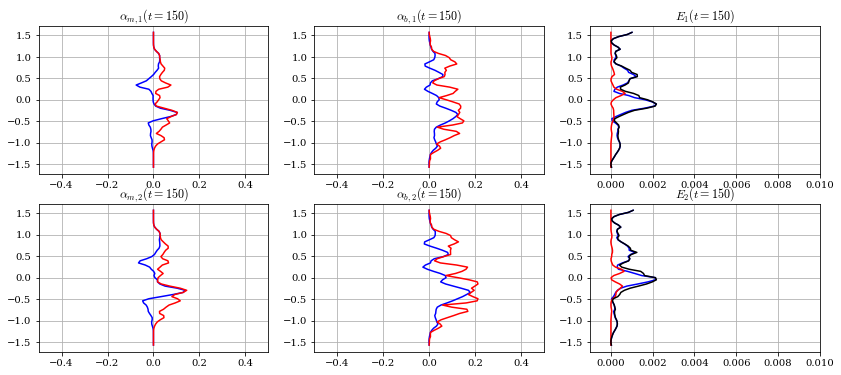

In [12]:
kt = 150

gamma_m_L1L2, phi_m_L1L2, gamma_m_btbc, phi_m_btbc, gamma_b, phi_b, lam, K_L1L2, P, E_L1L2 = (
    calc_geom_param(data_dir, parameters, constants, kt))

fig = plt.figure(figsize=(14, 6))

# defining sin here "properly" seems to matter...
K_L1L2, K_btbc, M_L1L2, N_L1L2, M_btbc, N_btbc = calc_eddy_mom(data_dir, parameters, constants, kt)
should_be = zonal_ave(N_L1L2) / np.sqrt(zonal_ave(M_L1L2) ** 2 + zonal_ave(N_L1L2) ** 2)
# alpha_m = gamma_m_L1L2 * (np.cos(lam) ** 2) * np.sin(2 * phi_m_L1L2)
alpha_m = gamma_m_L1L2 * (np.cos(lam) ** 2) * (
    np.where(should_be >= 0.0, np.sin(2.0 * phi_m_L1L2), np.sin(2.0 * phi_m_L1L2 + np.pi)))
alpha_m_star = gamma_m_L1L2 * (np.cos(lam) ** 2)

# defining sin here "properly" seems to matter...
P, R, S = calc_eddy_buoy(data_dir, parameters, constants, kt)
should_be = zonal_ave(S) / np.sqrt(zonal_ave(R) ** 2 + zonal_ave(S) ** 2)
alpha_b       = np.zeros(gamma_b.shape)
# alpha_b[:, 0] = gamma_b[:, 0] * np.sin(2 * lam[:, 0]) * np.sin(phi_b)
# alpha_b[:, 1] = gamma_b[:, 1] * np.sin(2 * lam[:, 1]) * np.sin(phi_b)
alpha_b[:, 0] = gamma_b[:, 0] * np.sin(2 * lam[:, 0]) * (
    np.where(should_be >= 0.0, np.sin(phi_b), np.sin(phi_b - np.pi)))
alpha_b[:, 1] = gamma_b[:, 1] * np.sin(2 * lam[:, 1]) * (
    np.where(should_be >= 0.0, np.sin(phi_b), np.sin(phi_b - np.pi)))

alpha_b_star       = np.zeros(gamma_b.shape)
alpha_b_star[:, 0] = gamma_b[:, 0] * np.sin(2 * lam[:, 0])
alpha_b_star[:, 1] = gamma_b[:, 1] * np.sin(2 * lam[:, 1])

ax = plt.subplot2grid((2, 3), (0, 0), colspan = 1)
ax.plot(alpha_m[:, 1], y_vec, 'b')
ax.plot(alpha_m_star[:, 1], y_vec, 'r')
ax.set_xlim([-0.5, 0.5])
ax.set_title(r"$\alpha_{m, 1} (t = %g)$" % kt)
ax.grid()

ax = plt.subplot2grid((2, 3), (1, 0), colspan = 1)
ax.plot(alpha_m[:, 0], y_vec, 'b')
ax.plot(alpha_m_star[:, 0], y_vec, 'r')
ax.set_xlim([-0.5, 0.5])
ax.set_title(r"$\alpha_{m, 2} (t = %g)$" % kt)
ax.grid()

ax = plt.subplot2grid((2, 3), (0, 1), colspan = 1)
ax.plot(alpha_b[:, 1], y_vec, 'b')
ax.plot(alpha_b_star[:, 1], y_vec, 'r')
ax.set_xlim([-0.5, 0.5])
ax.set_title(r"$\alpha_{b, 1} (t = %g)$" % kt)
ax.grid()

ax = plt.subplot2grid((2, 3), (1, 1), colspan = 1)
ax.plot(alpha_b[:, 0], y_vec, 'b')
ax.plot(alpha_b_star[:, 0], y_vec, 'r')
ax.set_xlim([-0.5, 0.5])
ax.set_title(r"$\alpha_{b, 2} (t = %g)$" % kt)
ax.grid()

ax = plt.subplot2grid((2, 3), (0, 2), colspan = 1)
ax.plot(zonal_ave(K_L1L2[:, 1]), y_vec, 'b')
ax.plot(zonal_ave(P[:, 1]), y_vec, 'r')
ax.plot(zonal_ave(E_L1L2[:, 1]), y_vec, 'k')
ax.set_xlim([-1e-3, 1e-2])
ax.set_title(r"$E_1 (t = %g)$" % kt)
ax.grid()

ax = plt.subplot2grid((2, 3), (1, 2), colspan = 1)
ax.plot(zonal_ave(K_L1L2[:, 0]), y_vec, 'b')
ax.plot(zonal_ave(P[:, 0]), y_vec, 'r')
ax.plot(zonal_ave(E_L1L2[:, 0]), y_vec, 'k')
ax.set_xlim([-1e-3, 1e-2])
ax.set_title(r"$E_2 (t = %g)$" % kt)
ax.grid()

In [26]:
kt = 750

gamma_m_L1L2, phi_m_L1L2, gamma_m_btbc, phi_m_btbc, gamma_b, phi_b, lam, K_L1L2, P, E_L1L2 = (
    calc_geom_param(data_dir, parameters, constants, kt))

# defining sin here "properly" seems to matter...
K_L1L2, K_btbc, M_L1L2, N_L1L2, M_btbc, N_btbc = calc_eddy_mom(data_dir, parameters, constants, kt)
should_be = zonal_ave(N_L1L2) / np.sqrt(zonal_ave(M_L1L2) ** 2 + zonal_ave(N_L1L2) ** 2)
# alpha_m = gamma_m_L1L2 * (np.cos(lam) ** 2) * np.sin(2 * phi_m_L1L2)
alpha_m = gamma_m_L1L2 * (np.cos(lam) ** 2) * (
    np.where(should_be >= 0.0, np.sin(2.0 * phi_m_L1L2), np.sin(2.0 * phi_m_L1L2 + np.pi)))
alpha_m_star = gamma_m_L1L2 * (np.cos(lam) ** 2)

# defining sin here "properly" seems to matter...
P, R, S = calc_eddy_buoy(data_dir, parameters, constants, kt)
should_be = zonal_ave(S) / np.sqrt(zonal_ave(R) ** 2 + zonal_ave(S) ** 2)
alpha_b       = np.zeros(gamma_b.shape)
# alpha_b[:, 0] = gamma_b[:, 0] * np.sin(2 * lam[:, 0]) * np.sin(phi_b)
# alpha_b[:, 1] = gamma_b[:, 1] * np.sin(2 * lam[:, 1]) * np.sin(phi_b)
alpha_b[:, 0] = gamma_b[:, 0] * np.sin(2 * lam[:, 0]) * (
    np.where(should_be >= 0.0, np.sin(phi_b), np.sin(phi_b - np.pi)))
alpha_b[:, 1] = gamma_b[:, 1] * np.sin(2 * lam[:, 1]) * (
    np.where(should_be >= 0.0, np.sin(phi_b), np.sin(phi_b - np.pi)))

alpha_b_star       = np.zeros(gamma_b.shape)
alpha_b_star[:, 0] = gamma_b[:, 0] * np.sin(2 * lam[:, 0])
alpha_b_star[:, 1] = gamma_b[:, 1] * np.sin(2 * lam[:, 1])

# maybe only do calculation over region of large enough energy?
print(" alpha_b_1  = %.6f" % (np.trapz(alpha_b[:, 1], y_vec) / (y_vec[-1] - y_vec[0])))
print(" alpha_b_2  = %.6f" % (np.trapz(alpha_b[:, 0], y_vec) / (y_vec[-1] - y_vec[0])))
print(" alpha_m_1  = %.6f" % (np.trapz(alpha_m[:, 1], y_vec) / (y_vec[-1] - y_vec[0])))
print(" alpha_m_2  = %.6f" % (np.trapz(alpha_m[:, 0], y_vec) / (y_vec[-1] - y_vec[0])))
print("|alpha_b_1| = %.6f" % (np.trapz(np.abs(alpha_b[:, 1]), y_vec) / (y_vec[-1] - y_vec[0])))
print("|alpha_b_2| = %.6f" % (np.trapz(np.abs(alpha_b[:, 0]), y_vec) / (y_vec[-1] - y_vec[0])))
print("|alpha_m_1| = %.6f" % (np.trapz(np.abs(alpha_m[:, 1]), y_vec) / (y_vec[-1] - y_vec[0])))
print("|alpha_m_2| = %.6f" % (np.trapz(np.abs(alpha_m[:, 0]), y_vec) / (y_vec[-1] - y_vec[0])))

 alpha_b_1  = -0.000748
 alpha_b_2  = -0.001177
 alpha_m_1  = 0.008929
 alpha_m_2  = 0.012492
|alpha_b_1| = 0.019454
|alpha_b_2| = 0.023646
|alpha_m_1| = 0.009594
|alpha_m_2| = 0.013349


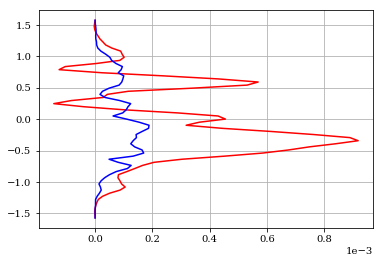

In [14]:
plt.plot(zonal_ave(S), y_vec, 'r')
plt.plot(alpha_b_star[:, 0] * zonal_ave(E_L1L2[:, :, 0]), y_vec, 'b')
plt.grid()

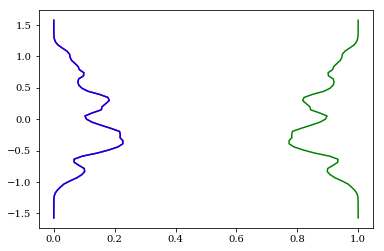

In [15]:
# define lambda as a tan?
lam = np.arctan(np.sqrt(zonal_ave(K_L1L2[:, :, 1]) / zonal_ave(P[:, :, 1])))
plt.plot(np.cos(lam) ** 2, y_vec, 'r')
plt.plot(zonal_ave(K_L1L2[:, :, 1]) / np.maximum(zonal_ave(E_L1L2[:, :, 1]), 1e-16), y_vec, 'g')
plt.plot(zonal_ave(P[:, :, 1]) / np.maximum(zonal_ave(E_L1L2[:, :, 1]), 1e-16), y_vec, 'b')

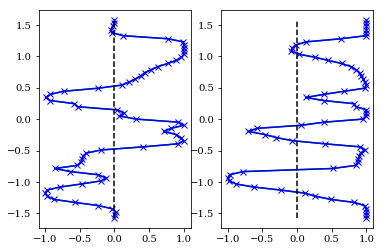

In [16]:
# phi_m diagnosed should match when they are used to construct the appropriate quantities

phi_m = 0.5 * np.arccos(-zonal_ave(M_L1L2[:, :, 0]) / np.sqrt(zonal_ave(M_L1L2[:, :, 0]) ** 2 + zonal_ave(N_L1L2[:, :, 0]) ** 2))
# plt.plot(phi_m / np.pi, y_vec, 'r')
# plt.plot(np.sin(phi_m), y_vec, 'g')
should_be = zonal_ave(N_L1L2[:, :, 0]) / np.sqrt(zonal_ave(M_L1L2[:, :, 0]) ** 2 + zonal_ave(N_L1L2[:, :, 0]) ** 2)
# shift it by pi because "phi_m" = 2 phi_m which has a period of pi
plt.subplot(1, 2, 1)
plt.plot(np.where(should_be >= 0.0, np.sin(2.0 * phi_m), np.sin(2.0 * phi_m + np.pi)), y_vec, 'g')
plt.plot(should_be, y_vec, 'bx-')
plt.plot(np.abs(should_be) - np.abs(np.sin(2.0 * phi_m)), y_vec, 'k--')

phi_m = 0.5 * np.arcsin(zonal_ave(N_L1L2[:, :, 0]) / np.sqrt(zonal_ave(M_L1L2[:, :, 0]) ** 2 + zonal_ave(N_L1L2[:, :, 0]) ** 2))
should_be = zonal_ave(-M_L1L2[:, :, 0]) / np.sqrt(zonal_ave(M_L1L2[:, :, 0]) ** 2 + zonal_ave(N_L1L2[:, :, 0]) ** 2)
# shift it by pi because "phi_m" = 2 phi_m which has a period of pi
plt.subplot(1, 2, 2)
# plt.plot(np.sin(phi_m), y_vec, 'g')
plt.plot(np.where(should_be >= 0.0, np.cos(2.0 * phi_m), np.cos(2.0 * phi_m + np.pi)), y_vec, 'g')
plt.plot(should_be, y_vec, 'bx-')
plt.plot(np.abs(should_be) - np.abs(np.cos(2.0 * phi_m)), y_vec, 'k--')

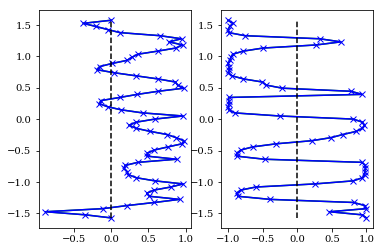

In [17]:
# phi_m diagnosed should match when they are used to construct the appropriate quantities

phi_b = np.arccos(zonal_ave(R) / np.sqrt(zonal_ave(R) ** 2 + zonal_ave(S) ** 2))
should_be = zonal_ave(S) / np.sqrt(zonal_ave(R) ** 2 + zonal_ave(S) ** 2)
# shift it by pi from sin to cos and vice versa
plt.subplot(1, 2, 1)
plt.plot(np.where(should_be >= 0.0, np.sin(phi_b), np.sin(phi_b + np.pi)), y_vec, 'g')
plt.plot(should_be, y_vec, 'bx-')
plt.plot(np.abs(should_be) - np.abs(np.sin(phi_b)), y_vec, 'k--')

phi_b = np.arcsin(zonal_ave(S) / np.sqrt(zonal_ave(R) ** 2 + zonal_ave(S) ** 2))
should_be = zonal_ave(R) / np.sqrt(zonal_ave(R) ** 2 + zonal_ave(S) ** 2)
# # shift it by pi because "phi_m" = 2 phi_m which has a period of pi
plt.subplot(1, 2, 2)
plt.plot(np.where(should_be >= 0.0, np.cos(phi_b), np.cos(phi_b + np.pi)), y_vec, 'g')
plt.plot(should_be, y_vec, 'bx-')
plt.plot(np.abs(should_be) - np.abs(np.cos(phi_b)), y_vec, 'k--')

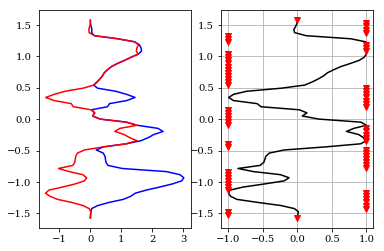

In [18]:
phi_m = np.arccos(-zonal_ave(M_L1L2[:, :, 0]) / np.sqrt(zonal_ave(M_L1L2[:, :, 0]) ** 2 + zonal_ave(N_L1L2[:, :, 0]) ** 2))
argu = zonal_ave(N_L1L2[:, :, 0]) / np.sqrt(zonal_ave(M_L1L2[:, :, 0]) ** 2 + zonal_ave(N_L1L2[:, :, 0]) ** 2)
# phi_m1 = np.where(np.sign(zonal_ave(N_L1L2[:, :, 0])) * np.sign(zonal_ave(M_L1L2[:, :, 0])) > 0, -np.arcsin(argu) + np.pi, np.arcsin(argu))
phi_m1 = np.arcsin(argu)
plt.subplot(1, 2, 1)
plt.plot(phi_m, y_vec, 'b')
plt.plot(phi_m1, y_vec, 'r')

plt.subplot(1, 2, 2)
plt.plot(argu, y_vec, 'k')
plt.plot(np.sign(zonal_ave(N_L1L2[:, :, 0]) / zonal_ave(M_L1L2[:, :, 0])), y_vec, 'rv')
plt.grid()
# plt.plot(np.where(phi_m > 0.5 * np.pi, phi_m + np.pi, phi_m), y_vec, 'r')

In [19]:
np.arctan(zonal_ave(N_L1L2[:, :, 0]) / zonal_ave(M_L1L2[:, :, 0]))

array([-0.        , -0.00651461, -0.01599323,  0.04000996,  0.23575856,
        0.5990299 ,  1.06113397,  1.30377167,  1.4508562 , -1.33793912,
       -0.89704304, -0.49184683, -0.18965798, -0.11968953, -0.24592887,
       -0.68589925,  1.03088287,  0.56747609,  0.50387006,  0.48815343,
        0.4705287 ,  0.41508092,  0.19122478, -0.42554606, -1.16190435,
        1.50422578,  1.26978564,  1.08980051,  0.79062002,  0.95851894,
       -1.50863942, -1.16722711, -0.31604589, -0.07242324, -0.1400616 ,
       -0.03165841,  0.55349206,  0.61696204,  1.1774979 ,  1.44325414,
        1.17396957,  0.82280709,  0.23295744, -0.10632247, -0.21521441,
       -0.30809152, -0.39139332, -0.45130966, -0.55733711, -0.68164921,
       -0.87349279, -1.10525828, -1.30946489, -1.54315509,  1.48651071,
        1.50326498,  1.55250274, -1.43812035, -0.88601509, -0.12749153,
        0.03932638,  0.04946543,  0.02389687,  0.00396917, -0.        ])